# AIBS physiology data EDA

In [25]:
%matplotlib inline

In [79]:
import pymongo 
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize
from bson import ObjectId, json_util
import json
sns.set()

In [2]:
client = pymongo.MongoClient('mongodb://localhost/:27017')
db = client.aibs 
n_coll = db.neurons

In [422]:
# Explore physiology data 
n_df = pd.DataFrame({a['id']:a['ephys_features'][0] for a in n_coll.find()}).T

In [423]:
# View a sample 
n_coll.find_one()

{u'_id': ObjectId('5a7e4a759d477a281bf4dbca'),
 u'apical': u'intact',
 u'cell_prep_sample_id': None,
 u'cell_reporter': {u'id': 491913824, u'name': u'cre reporter negative'},
 u'cell_reporter_id': 491913824,
 u'cell_soma_locations': [{u'id': 500915240,
   u'normalized_depth': 0.602377718610363,
   u'reference_space_id': 9,
   u'specimen_id': 486111903,
   u'x': 8484.28452993131,
   u'y': 1018.82380442194,
   u'z': 3454.08503673929}],
 u'cortex_layer_id': None,
 u'data': None,
 u'data_sets': [{u'blue_channel': None,
   u'delegate': False,
   u'expression': False,
   u'failed': False,
   u'failed_facet': 734881840,
   u'green_channel': None,
   u'id': 488961576,
   u'name': u'T301-Ax.150909_01_C02_486111903',
   u'plane_of_section_id': 1,
   u'qc_date': None,
   u'red_channel': None,
   u'reference_space_id': 9,
   u'rnaseq_design_id': None,
   u'section_thickness': 0.28,
   u'specimen_id': 486111903,
   u'sphinx_id': 168768,
   u'storage_directory': u'/external/mousecelltypes/prod541/im

In [425]:
# easier to have generic indices
n_df.reset_index(inplace=True)

In [426]:
len(n_df.columns)

57

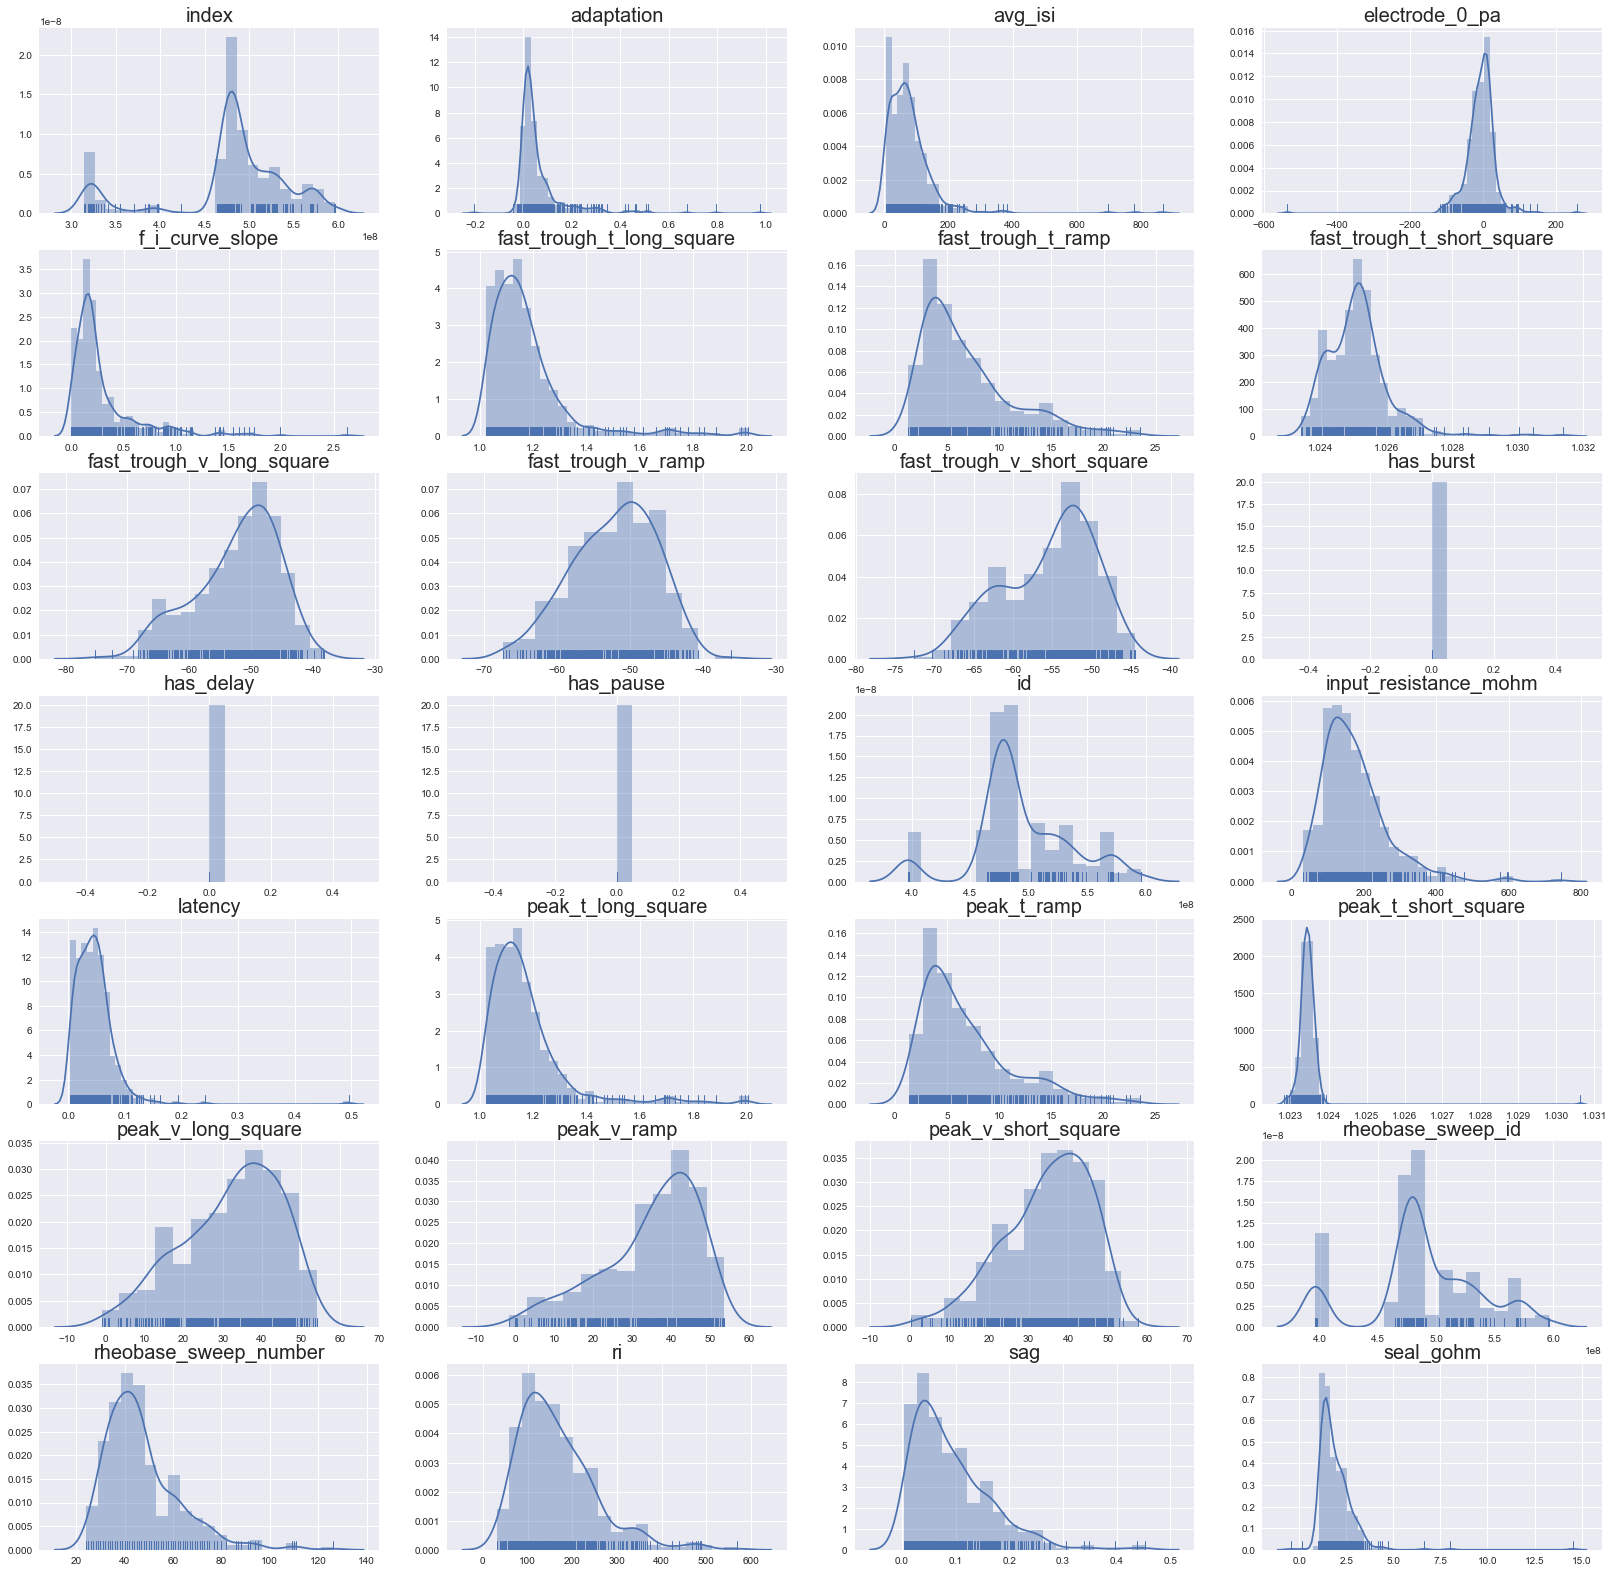

In [431]:
fig, ax = plt.subplots(7,4)
fig.set_size_inches(7*4,7*4)
axes = ax.flatten()
for a,i in enumerate(range(0,28)): 
    sns.distplot(n_df.iloc[:,[i]].dropna(), rug=True, ax=axes[a])
    axes[a].set_title(n_df.columns[i],fontsize=20)

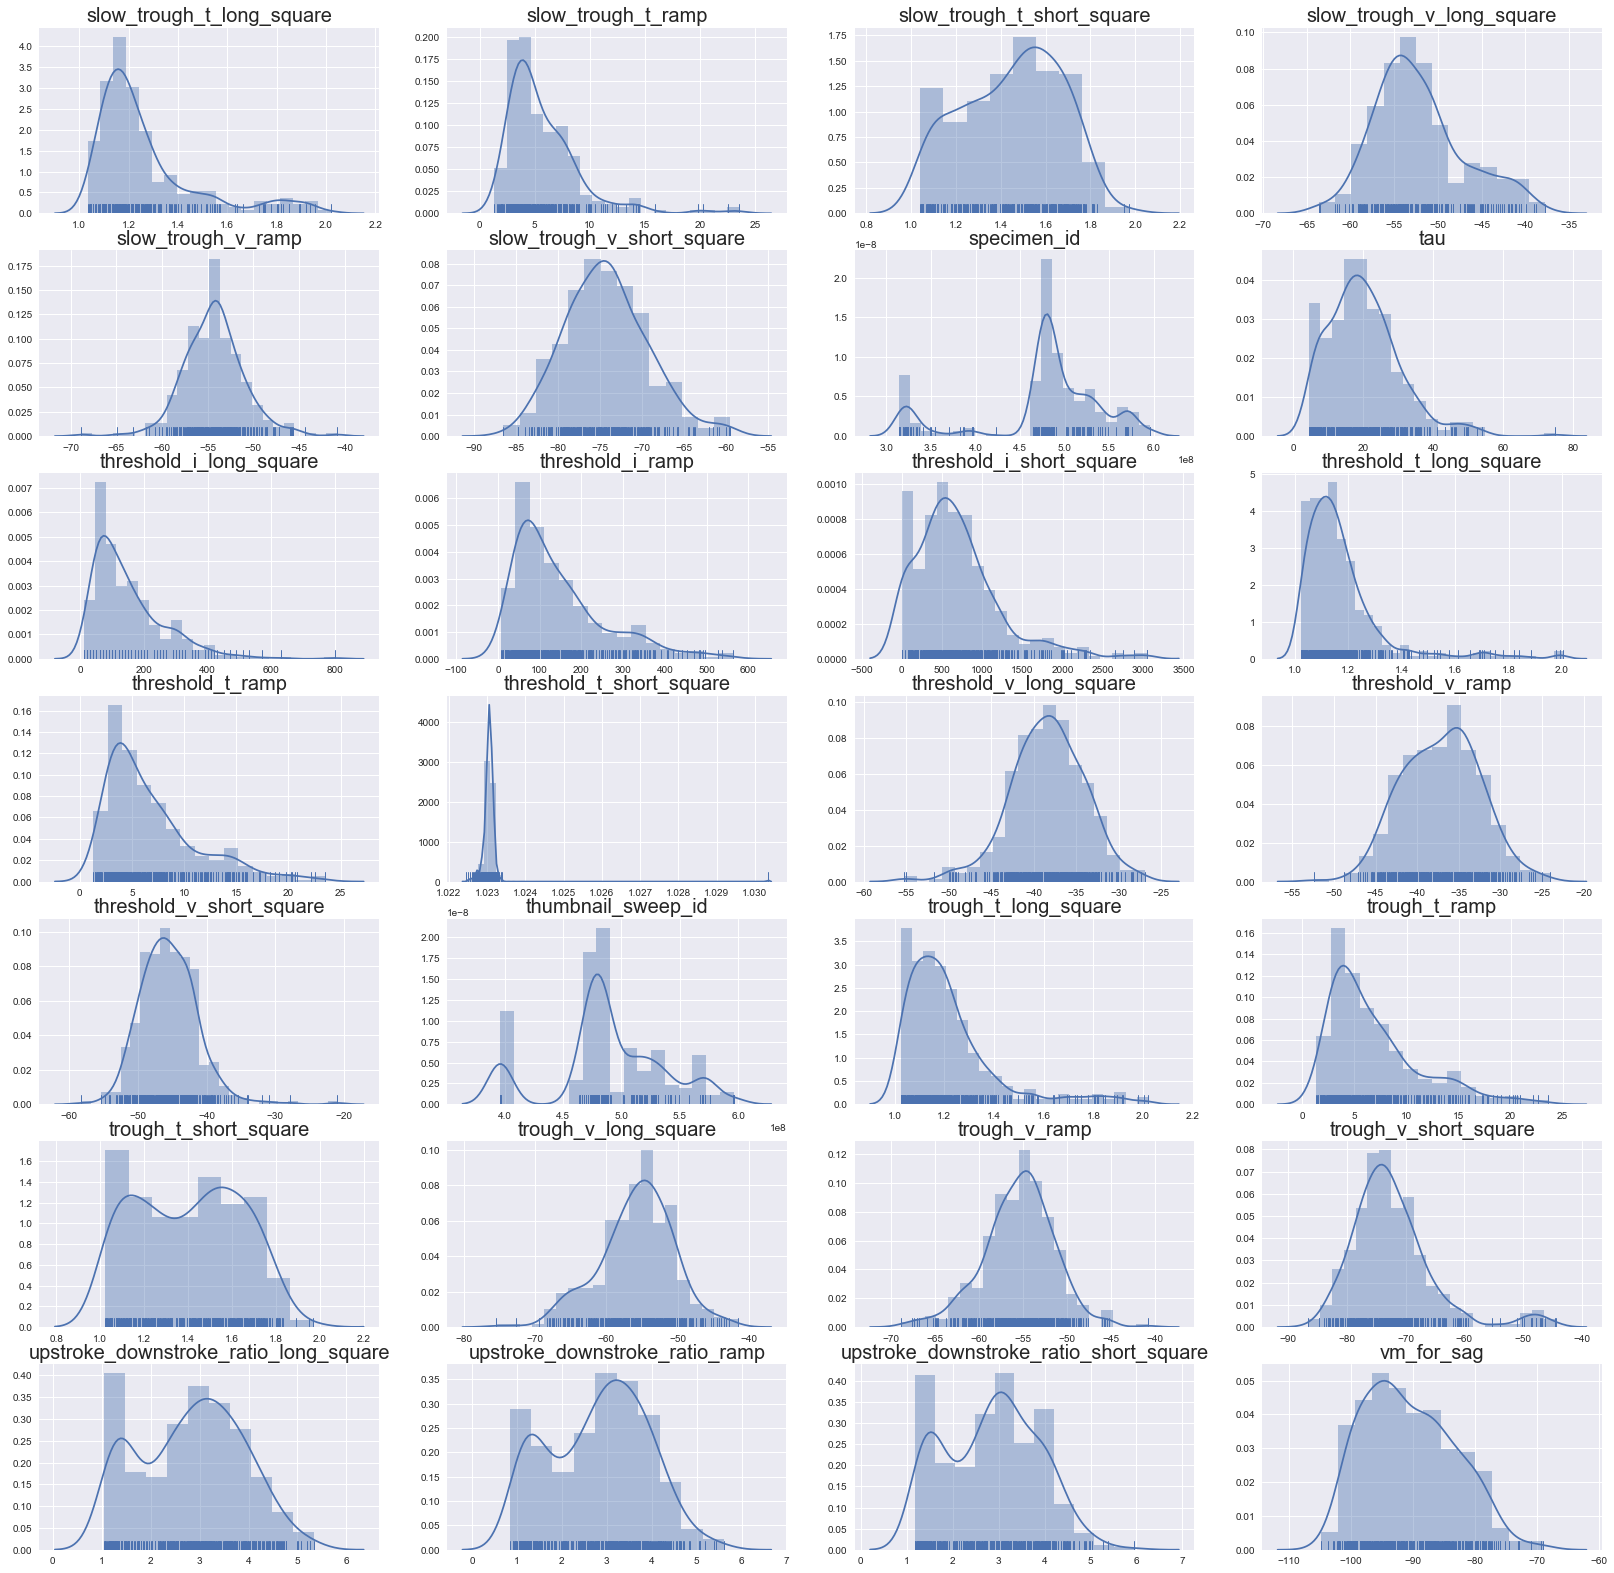

In [433]:
fig, ax = plt.subplots(7,4)
fig.set_size_inches(7*4,7*4)
axes = ax.flatten()
for a,i in enumerate(range(28,56)): 
    sns.distplot(n_df.iloc[:,[i]].dropna(), rug=True, ax=axes[a])
    axes[a].set_title(n_df.columns[i],fontsize=20)

## convert data types 

In [144]:
import collections

In [158]:
n_df.columns

Index([u'adaptation', u'avg_isi', u'electrode_0_pa', u'f_i_curve_slope',
       u'fast_trough_t_long_square', u'fast_trough_t_ramp',
       u'fast_trough_t_short_square', u'fast_trough_v_long_square',
       u'fast_trough_v_ramp', u'fast_trough_v_short_square', u'has_burst',
       u'has_delay', u'has_pause', u'id', u'input_resistance_mohm', u'latency',
       u'peak_t_long_square', u'peak_t_ramp', u'peak_t_short_square',
       u'peak_v_long_square', u'peak_v_ramp', u'peak_v_short_square',
       u'rheobase_sweep_id', u'rheobase_sweep_number', u'ri', u'sag',
       u'seal_gohm', u'slow_trough_t_long_square', u'slow_trough_t_ramp',
       u'slow_trough_t_short_square', u'slow_trough_v_long_square',
       u'slow_trough_v_ramp', u'slow_trough_v_short_square', u'specimen_id',
       u'tau', u'threshold_i_long_square', u'threshold_i_ramp',
       u'threshold_i_short_square', u'threshold_t_long_square',
       u'threshold_t_ramp', u'threshold_t_short_square',
       u'threshold_v_long_squa

In [162]:
dtype = collections.defaultdict()
for a in n_df.columns: 
    dtype[a] = raw_input("'{}' data type: ".format(a))

'adaptation' data type: f
'avg_isi' data type: f
'electrode_0_pa' data type: f
'f_i_curve_slope' data type: f
'fast_trough_t_long_square' data type: f
'fast_trough_t_ramp' data type: f
'fast_trough_t_short_square' data type: f
'fast_trough_v_long_square' data type: f
'fast_trough_v_ramp' data type: f
'fast_trough_v_short_square' data type: f
'has_burst' data type: b
'has_delay' data type: b
'has_pause' data type: b
'id' data type: i
'input_resistance_mohm' data type: f
'latency' data type: f
'peak_t_long_square' data type: f
'peak_t_ramp' data type: f
'peak_t_short_square' data type: f
'peak_v_long_square' data type: f
'peak_v_ramp' data type: f
'peak_v_short_square' data type: f
'rheobase_sweep_id' data type: i
'rheobase_sweep_number' data type: i
'ri' data type: f
'sag' data type: f
'seal_gohm' data type: f
'slow_trough_t_long_square' data type: f
'slow_trough_t_ramp' data type: f
'slow_trough_t_short_square' data type: f
'slow_trough_v_long_square' data type: f
'slow_trough_v_ramp' 

In [166]:
dtype.keys()

[u'tau',
 u'threshold_t_long_square',
 u'thumbnail_sweep_id',
 u'threshold_v_short_square',
 u'threshold_v_ramp',
 u'peak_v_short_square',
 u'avg_isi',
 u'sag',
 u'trough_t_ramp',
 u'threshold_t_ramp',
 u'slow_trough_v_ramp',
 u'adaptation',
 u'has_pause',
 u'electrode_0_pa',
 u'trough_v_long_square',
 u'input_resistance_mohm',
 u'id',
 u'latency',
 u'fast_trough_v_ramp',
 u'vm_for_sag',
 u'slow_trough_v_long_square',
 u'rheobase_sweep_id',
 u'peak_t_ramp',
 u'threshold_t_short_square',
 u'has_burst',
 u'upstroke_downstroke_ratio_short_square',
 u'slow_trough_t_long_square',
 u'threshold_v_long_square',
 u'fast_trough_t_long_square',
 u'ri',
 u'has_delay',
 u'upstroke_downstroke_ratio_ramp',
 u'trough_t_long_square',
 u'specimen_id',
 u'threshold_i_long_square',
 u'threshold_i_short_square',
 u'rheobase_sweep_number',
 u'peak_v_ramp',
 u'fast_trough_v_short_square',
 u'fast_trough_t_short_square',
 u'peak_t_short_square',
 u'threshold_i_ramp',
 u'slow_trough_v_short_square',
 u'fast_tr

In [434]:
for key in dtype.keys(): 
    if dtype[key]=='f': 
        n_df[key]=n_df[key].astype('float64')
    elif dtype[key]=='i': 
        n_df[key]=n_df[key].astype('int64')
    elif dtype[key]=='b':
        n_df[key]=n_df[key].astype('bool')

In [435]:
n_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402 entries, 0 to 401
Data columns (total 57 columns):
index                                     402 non-null int64
adaptation                                329 non-null float64
avg_isi                                   375 non-null float64
electrode_0_pa                            399 non-null float64
f_i_curve_slope                           402 non-null float64
fast_trough_t_long_square                 402 non-null float64
fast_trough_t_ramp                        392 non-null float64
fast_trough_t_short_square                402 non-null float64
fast_trough_v_long_square                 402 non-null float64
fast_trough_v_ramp                        392 non-null float64
fast_trough_v_short_square                402 non-null float64
has_burst                                 402 non-null bool
has_delay                                 402 non-null bool
has_pause                                 402 non-null bool
id                      

In [177]:
n_df.describe()

,adaptation,avg_isi,electrode_0_pa,f_i_curve_slope,fast_trough_t_long_square,fast_trough_t_ramp,fast_trough_t_short_square,fast_trough_v_long_square,fast_trough_v_ramp,fast_trough_v_short_square,...,trough_t_ramp,trough_t_short_square,trough_v_long_square,trough_v_ramp,trough_v_short_square,upstroke_downstroke_ratio_long_square,upstroke_downstroke_ratio_ramp,upstroke_downstroke_ratio_short_square,vm_for_sag,vrest
count,329.000000,375.000000,399.000000,4.020000e+02,402.000000,392.000000,402.000000,402.000000,392.000000,402.000000,...,392.000000,402.000000,402.000000,392.000000,402.000000,402.000000,392.000000,402.000000,402.000000,402.000000
mean,0.067127,80.158929,-6.438540,2.988061e-01,1.178263,6.874753,1.025121,-52.328516,-52.159567,-55.422174,...,6.896215,1.401722,-55.836912,-55.472220,-72.260916,2.821743,2.800931,2.848586,-90.551232,-72.496701
std,0.115454,86.501122,46.264755,3.378349e-01,0.156686,4.405594,0.000968,6.798637,5.732454,5.797538,...,4.402499,0.240638,5.212609,4.005989,7.100535,1.052901,1.089167,1.016079,7.231696,5.222737
min,-0.204913,3.828333,-536.389988,-4.410400e-19,1.024780,1.307655,1.023389,-75.312500,-67.447922,-72.618756,...,1.307693,1.024258,-75.500008,-68.812508,-86.492189,1.049267,0.832619,1.174354,-104.843758,-85.449173
25%,0.011259,31.027742,-23.601563,1.161607e-01,1.085767,3.556505,1.024495,-56.367191,-56.106773,-60.153517,...,3.575625,1.181528,-58.929688,-57.846356,-76.732816,1.909178,1.845190,1.872168,-96.281250,-75.913546
50%,0.029513,64.796786,-1.355000,1.850244e-01,1.140823,5.505161,1.025076,-51.062504,-51.442712,-54.043753,...,5.530922,1.421039,-55.359377,-55.161460,-73.341668,2.939680,2.956088,2.948893,-91.453133,-72.619183
75%,0.074184,98.770833,14.363125,3.350998e-01,1.210927,8.717534,1.025497,-47.320313,-47.804691,-51.035940,...,8.742192,1.604591,-52.367191,-52.924480,-69.345316,3.620577,3.635953,3.599993,-85.250008,-69.427820
max,0.975859,869.920000,256.913130,2.630001e+00,2.003560,23.522740,1.031385,-38.187500,-36.109377,-44.494794,...,23.582867,1.970207,-41.593750,-40.859377,-44.515628,5.344803,5.614289,5.949575,-68.937500,-57.302387


Decipher what these features are

In [ ]:
n_coll

In [444]:
n_df['index'][0]

313861608

In [445]:
spiny_label=collections.defaultdict()
for a in  n_df['index']: 
    spiny_label[a] = n_coll.find({'id':a}).next()['dendrite_type']

In [446]:
collections.Counter(spiny_label.values())

Counter({u'aspiny': 132, u'sparsely spiny': 13, u'spiny': 257})

In [447]:
n_df['spiny_label'] = np.array(n_df.reset_index()['index'].map(spiny_label))

In [467]:
n_df.isna().sum()

index                                       0
adaptation                                 73
avg_isi                                    27
electrode_0_pa                              3
f_i_curve_slope                             0
fast_trough_t_long_square                   0
fast_trough_t_ramp                         10
fast_trough_t_short_square                  0
fast_trough_v_long_square                   0
fast_trough_v_ramp                         10
fast_trough_v_short_square                  0
has_burst                                   0
has_delay                                   0
has_pause                                   0
id                                          0
input_resistance_mohm                       0
latency                                     0
peak_t_long_square                          0
peak_t_ramp                                10
peak_t_short_square                         0
peak_v_long_square                          0
peak_v_ramp                       

In [521]:
# remove the "slow_trough" features
n_df2 = n_df[[b for b in n_df.columns if b not in [a for a in n_df.columns if a.startswith('slow')]]]

In [538]:
n_df3 = n_df2.drop(['avg_isi','electrode_0_pa', 'adaptation'], axis=1)

In [539]:
n_df3.fillna(method='average')

ValueError: Invalid fill method. Expecting pad (ffill) or backfill (bfill). Got average

In [540]:
n_df3[n_df3.isnull().any(axis=1)]

,index,f_i_curve_slope,fast_trough_t_long_square,fast_trough_t_ramp,fast_trough_t_short_square,fast_trough_v_long_square,fast_trough_v_ramp,fast_trough_v_short_square,has_burst,has_delay,...,trough_t_short_square,trough_v_long_square,trough_v_ramp,trough_v_short_square,upstroke_downstroke_ratio_long_square,upstroke_downstroke_ratio_ramp,upstroke_downstroke_ratio_short_square,vm_for_sag,vrest,spiny_label
10,318331342,6.146875e-01,1.032425,NaN,1.024323,-57.593750,NaN,-59.119794,False,False,...,1.142229,-57.687504,NaN,-74.255210,1.478332,NaN,1.588880,-93.031250,-73.888748,aspiny
24,323452245,1.176471e-02,1.046840,NaN,1.026063,-48.843754,NaN,-52.166667,False,False,...,1.547079,-51.218750,NaN,-72.312501,3.718802,NaN,3.633285,-78.906250,-71.979202,spiny
41,330080937,9.211065e-01,1.732575,NaN,1.024304,-55.906250,NaN,-64.039062,False,False,...,1.233831,-56.031250,NaN,-82.390625,1.203992,NaN,1.527796,-99.812500,-81.435875,aspiny
43,333785935,2.337079e-01,1.031010,NaN,1.023640,-64.062500,NaN,-62.481252,False,False,...,1.417376,-64.281258,NaN,-78.143750,1.276902,NaN,1.458890,-100.093750,-77.642426,aspiny
77,469992918,-4.410400e-19,1.024780,NaN,1.023942,-59.781254,NaN,-61.789066,False,False,...,1.718456,-59.843754,NaN,-79.304691,1.278412,NaN,1.277759,-94.625000,-77.865257,aspiny
82,471088062,1.990630e+00,1.028835,NaN,1.023962,-62.062500,NaN,-62.020836,False,False,...,1.379182,-62.218750,NaN,-77.531255,1.113791,NaN,1.204846,-100.375008,-76.645317,aspiny
119,475623964,8.482143e-03,1.053330,NaN,1.024577,-45.906254,NaN,-49.262502,False,False,...,1.328070,-46.968750,NaN,-72.762505,1.803722,NaN,2.099337,-95.281258,-71.576042,aspiny
141,476751360,6.821240e-01,1.030015,NaN,1.024226,-57.218754,NaN,-59.901045,False,False,...,1.312264,-57.406254,NaN,-75.026043,1.291672,NaN,1.280802,-93.156258,-74.121048,aspiny
155,478828646,1.418977e+00,1.027100,NaN,1.023431,-62.000000,NaN,-61.712503,False,False,...,1.409948,-62.093754,NaN,-72.056253,1.211476,NaN,1.243600,-94.218750,-71.328300,aspiny
182,482516631,1.142708e+00,1.030000,NaN,1.023763,-65.718758,NaN,-65.281253,False,False,...,1.490653,-65.781250,NaN,-76.237506,1.147832,NaN,1.230034,-99.281250,-75.248299,aspiny


In [541]:
n_df3.isna().sum()

index                                      0
f_i_curve_slope                            0
fast_trough_t_long_square                  0
fast_trough_t_ramp                        10
fast_trough_t_short_square                 0
fast_trough_v_long_square                  0
fast_trough_v_ramp                        10
fast_trough_v_short_square                 0
has_burst                                  0
has_delay                                  0
has_pause                                  0
id                                         0
input_resistance_mohm                      0
latency                                    0
peak_t_long_square                         0
peak_t_ramp                               10
peak_t_short_square                        0
peak_v_long_square                         0
peak_v_ramp                               10
peak_v_short_square                        0
rheobase_sweep_id                          0
rheobase_sweep_number                      0
ri        

In [549]:
X = n_df3.drop(['id','seal_gohm','specimen_id'],axis=1).dropna()

In [550]:
X_label = X.pop('index')
y = X.pop('spiny_label')

In [483]:
df = n_df.loc[:,[a for a in n_df.columns if ~a.startswith('slow')]]

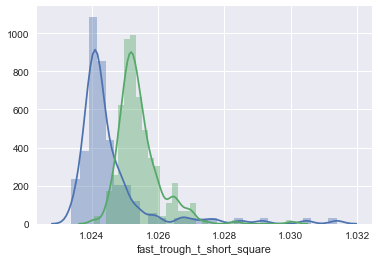

In [462]:
sns.distplot(n_df[n_df.spiny_label=='aspiny'].iloc[:,7].dropna(), label='aspiny')
sns.distplot(n_df[n_df.spiny_label=='spiny'].iloc[:,7].dropna(), label='spiny')

In [457]:
n_df.spiny_label

0              aspiny
1               spiny
2              aspiny
3              aspiny
4              aspiny
5               spiny
6               spiny
7               spiny
8               spiny
9               spiny
10             aspiny
11              spiny
12              spiny
13              spiny
14             aspiny
15              spiny
16              spiny
17             aspiny
18             aspiny
19             aspiny
20              spiny
21             aspiny
22             aspiny
23             aspiny
24              spiny
25             aspiny
26             aspiny
27             aspiny
28             aspiny
29              spiny
            ...      
372            aspiny
373             spiny
374    sparsely spiny
375             spiny
376             spiny
377            aspiny
378             spiny
379             spiny
380            aspiny
381             spiny
382             spiny
383             spiny
384             spiny
385             spiny
386       

In [384]:
n_df = n_df.dropna()

In [385]:
X = n_df[(n_df.spiny_label == 'spiny') | (n_df.spiny_label == 'aspiny')]

In [415]:
X.shape

(174, 56)

In [238]:
import featureselection

Feature ranking:
1. fast_trough_v_short_square (0.130349621494)
2. upstroke_downstroke_ratio_short_square (0.117229772323)
3. fast_trough_t_short_square (0.0984510941636)
4. upstroke_downstroke_ratio_long_square (0.0839164249171)
5. peak_v_ramp (0.0717162957392)
6. upstroke_downstroke_ratio_ramp (0.0676230603707)
7. f_i_curve_slope (0.0670616118316)
8. fast_trough_v_long_square (0.0365627868527)
9. latency (0.0290251982172)
10. peak_v_long_square (0.0234972404322)
11. fast_trough_v_ramp (0.0221212465451)
12. peak_v_short_square (0.019561882925)
13. trough_v_ramp (0.0157097162866)
14. tau (0.0140762410685)
15. trough_v_long_square (0.0134591717836)
16. thumbnail_sweep_id (0.0124186708319)
17. sag (0.0122249622038)
18. trough_t_long_square (0.0115139918601)
19. threshold_v_ramp (0.00886436178488)
20. threshold_v_short_square (0.0086930507223)
21. rheobase_sweep_id (0.0086714302915)
22. threshold_t_long_square (0.00857162319033)
23. trough_t_ramp (0.00831853697483)
24. rheobase_sweep_numb

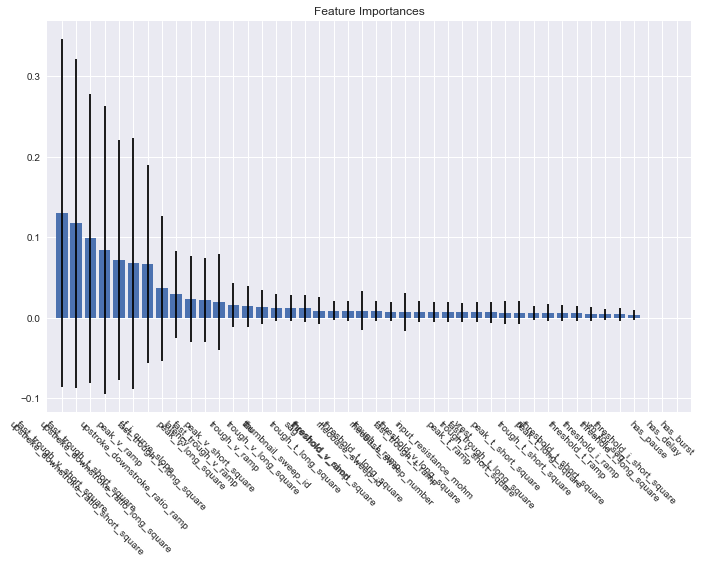

In [570]:
featureselection.feature_importance(X.values ,y, col_labels= X.columns.tolist(), n_estimators=56)

In [409]:
from sklearn.ensemble import RandomForestClassifier
cf = RandomForestClassifier(n_estimators=56)
cf.fit(X.values, y.values)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=56, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [401]:
from sklearn.metrics import accuracy_score

In [ ]:
cf

In [408]:
y.values

array([u'spiny', u'spiny', u'spiny', u'spiny', u'spiny', u'spiny',
       u'spiny', u'spiny', u'spiny', u'aspiny', u'spiny', u'spiny',
       u'spiny', u'aspiny', u'spiny', u'spiny', u'aspiny', u'spiny',
       u'spiny', u'spiny', u'spiny', u'spiny', u'spiny', u'spiny',
       u'spiny', u'spiny', u'spiny', u'spiny', u'aspiny', u'spiny',
       u'spiny', u'spiny', u'spiny', u'aspiny', u'aspiny', u'spiny',
       u'spiny', u'spiny', u'spiny', u'spiny', u'spiny', u'spiny',
       u'spiny', u'spiny', u'spiny', u'aspiny', u'aspiny', u'aspiny',
       u'aspiny', u'aspiny', u'spiny', u'aspiny', u'aspiny', u'aspiny',
       u'aspiny', u'aspiny', u'spiny', u'spiny', u'spiny', u'spiny',
       u'spiny', u'spiny', u'spiny', u'spiny', u'spiny', u'spiny',
       u'spiny', u'spiny', u'spiny', u'spiny', u'spiny', u'spiny',
       u'spiny', u'aspiny', u'spiny', u'spiny', u'aspiny', u'aspiny',
       u'spiny', u'spiny', u'spiny', u'aspiny', u'spiny', u'spiny',
       u'spiny', u'spiny', u'aspiny', u'sp

In [410]:
featureselection.leave_one_out_feature_import(X.values,y.values,cf, criterion = accuracy_score)

array([ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan])

In [275]:
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [277]:
clf = neighbors.KNeighborsClassifier(n_neighbors=3, weights='uniform')

In [279]:
clf.fit(X_dropna.values,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [280]:
clf.classes_

array([u'aspiny', u'spiny'], dtype=object)

In [281]:
clf.metric

'minkowski'

In [386]:
y = X.pop('spiny_label')

In [568]:
def plot_mult_decision_boundary(ax, X, y, k, scaled=True, title='Title', xlabel='xlabel', ylabel='ylabel'):
    """Plot the decision boundary of a kNN classifier.
    
    Builds and fits a sklearn kNN classifier internally.

    X must contain only 2 continuous features.

    Function modeled on sci-kit learn example.

    Parameters
    ----------
    ax: Matplotlib axes object
        The plot to draw the data and boundary on
        
    X: numpy array
        Training data
    
    y: numpy array
        Target labels
    
    k: int
        The number of neighbors that get a vote.
        
    scaled: boolean, optional (default=True)
        If true scales the features, else uses features in original units
    
    title: string, optional (default = 'Title')
        A string for the title of the plot
    
    xlabel: string, optional (default = 'xlabel')
        A string for the label on the x-axis of the plot
    
    ylabel: string, optional (default = 'ylabel')
        A string for the label on the y-axis of the plot
    

    Returns
    -------
    None
    """
    x_mesh_step_size = 0.5
    y_mesh_step_size = 0.05
    
    #Hard code in colors for classes, one class in red, one in blue
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#0000FF'])
    
    #Build a kNN classifier
    clf = neighbors.KNeighborsClassifier(n_neighbors=k, weights='uniform')
    
    if scaled:
        #Build pipeline to scale features
        clf = make_pipeline(StandardScaler(), clf)
        clf.fit(X, y)
    else:
        clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    feature_1 = X[:, 0]
    feature_2 = X[:, 1]
    x_min, x_max = feature_1.min() - 1, feature_1.max() + 1
    y_min, y_max = feature_2.min() - 1, feature_2.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, x_mesh_step_size),
                         np.arange(y_min, y_max, y_mesh_step_size))
    dec_boundary = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    dec_boundary = dec_boundary.reshape(xx.shape)
    ax.pcolormesh(xx, yy, dec_boundary, cmap=cmap_light)

    # Plot also the training points
    ax.scatter(feature_1, feature_2, c=y, cmap=cmap_bold)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())

    ax.set_title(title + ", k={0}, scaled={1}".format(k, scaled))
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

In [392]:
X.values.shape

(174, 56)

In [421]:
from nid import *

In [464]:
from sklearn import model_selection 

In [551]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,random_state=42, test_size=.2)

clf = RandomForestClassifier()

clf.fit(X_train, y_train)

print X.columns[clf.feature_importances_.argmax()]

preds = clf.predict(X_test)

accuracy_score(y_test, preds)

In [569]:
clf.feature_importances_

array([ 0.0256162 ,  0.00070173,  0.00714135,  0.03632482,  0.16405834,
        0.01109552,  0.05939237,  0.        ,  0.        ,  0.        ,
        0.01116802,  0.02375112,  0.00375504,  0.0048375 ,  0.00756263,
        0.04381561,  0.10864611,  0.02447077,  0.00376626,  0.00577478,
        0.01016748,  0.00425098,  0.06231663,  0.00135455,  0.        ,
        0.00021757,  0.00573077,  0.0042087 ,  0.00649555,  0.0028436 ,
        0.00552337,  0.00701002,  0.00672234,  0.00507715,  0.00533391,
        0.00627691,  0.0087071 ,  0.00858033,  0.00107284,  0.07348756,
        0.0533814 ,  0.17257146,  0.00038523,  0.00640641])

In [571]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()

In [572]:
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [573]:
knn_predict = knn_clf.predict(X_test)

In [575]:
accuracy_score(y_test, knn_predict)

0.70886075949367089

In [576]:
from sklearn.svm import SVC
svc_clf = SVC()

In [577]:
svc_clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [578]:
svc_predict = svc_clf.predict(X_test)

In [579]:
accuracy_score(y_test,svc_predict)

0.58227848101265822

In [581]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression()

In [582]:
lr_clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [583]:
lr_predict = lr_clf.predict(X_test)

In [584]:
accuracy_score(y_test,lr_predict)

0.58227848101265822

In [585]:
from sklearn.ensemble import GradientBoostingClassifier

In [586]:
gb_clf = GradientBoostingClassifier(loss='exponential',
                                   learning_rate=0.01,
                                   min_samples_leaf=5,
                                   subsample=0.5)

In [587]:
gb_clf.fit(X_train, y_train)

ValueError: ExponentialLoss requires 2 classes.

In [589]:
y_train

268             spiny
192             spiny
181            aspiny
67              spiny
350             spiny
239             spiny
339             spiny
390            aspiny
288            aspiny
230            aspiny
138             spiny
290             spiny
365             spiny
247             spiny
375             spiny
260             spiny
219             spiny
80             aspiny
110            aspiny
275             spiny
17             aspiny
70              spiny
167            aspiny
7               spiny
20              spiny
309    sparsely spiny
357             spiny
351             spiny
125             spiny
187             spiny
            ...      
354             spiny
245             spiny
262             spiny
22             aspiny
323             spiny
169             spiny
286             spiny
201            aspiny
303             spiny
353             spiny
267             spiny
318             spiny
158             spiny
137             spiny
160       